# **Importing necessary libraries**

In [22]:
!pip install tensorflow

In [4]:
!pip install scikit-learn

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------- ----------------------- 3.7/8.7 MB 20.6 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 31.5 MB/s eta 0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------- ----------------------------- 10.5/38.5 MB 62.2 MB/s eta 0:00:01
   ----------- ---------------------------- 11.3/38.5 MB 28.0 MB/s eta 0:00:01
   ------------- -------------------------- 12.8/38.5 MB 22.6 MB/s eta 0:00:02
   ------------------ --------------------- 17.6/38.5 MB 20.7 MB/s eta 0:00:02
   --------------------- ------------------ 20.7/38.5 MB 19.7 MB/s eta 0:00:01
   ----------------------------------- ---- 34.1/38.5 MB 26.7 MB/s eta 0:00:01
   -------------------------------------- - 37.0/

In [6]:
!pip install opencv-python

  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------------------- -------------------- 6.3/12.6 MB 36.0 MB/s eta 0:00:01
   ---------------------- ----------------- 7.1/12.6 MB 17.9 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 23.5 MB/s eta 0:00:00

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.3

    Uninstalling numpy-2.3.3:

      Successfully uninstalled numpy-2.3.3

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]

  You can safely remove it manually.
  You can safely remove it manually.


In [11]:
!pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.0 MB 15.1 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 31.0 MB/s eta 0:00:00
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   ---------------

In [13]:
!pip install seaborn matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.4-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------------- ------------ 5.5/8.1 MB 28.3 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 17.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 17.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 50.5 MB/s eta 0:00:00
Using cached pyparsing-3.2.4-py3-none-any.whl (113 kB)

   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- ---------------------------- 2/7 [fonttools]
   ----------- -

In [14]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.applications.efficientnet import EfficientNetB0,EfficientNetB1,EfficientNetB2,EfficientNetB3,EfficientNetB4
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
import csv
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss, jaccard_score
import numpy as np
import os
import cv2
import zipfile
from PIL import Image
from shutil import copyfile  # Import the copyfile function
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Checking GPU availability and CPU setting**

In [31]:
import tensorflow as tf

# GPU 메모리 증가 설정 (GPU 사용 시 메모리 부족 방지)
def setup_tensorflow():
    """TensorFlow GPU/CPU 자동 설정"""
    gpus = tf.config.experimental.list_physical_devices('GPU')
    
    if gpus:
        try:
            # GPU 메모리 증가 허용 (메모리 부족 에러 방지)
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            
            print("✅ GPU 사용 가능!")
            print(f"   감지된 GPU: {len(gpus)}개")
            device = '/GPU:0'
            
        except RuntimeError as e:
            print(f"❌ GPU 설정 실패: {e}")
            print("🔄 CPU 모드로 전환")
            device = '/CPU:0'
    else:
        print("⚠️ GPU 사용 불가 - CPU 모드 사용")
        device = '/CPU:0'
    
    return device

# 자동 설정 실행
device = setup_tensorflow()

# TensorFlow 정보 출력
print(f"TensorFlow 버전: {tf.__version__}")
print(f"사용할 디바이스: {device}")
print(f"GPU 사용 가능: {tf.config.list_physical_devices('GPU')}")

# 간단한 테스트 (선택사항)
def test_device():
    """현재 설정된 디바이스에서 간단한 연산 테스트"""
    try:
        with tf.device(device):
            a = tf.random.normal([100, 100])
            b = tf.random.normal([100, 100])
            c = tf.matmul(a, b)
        print("✅ 디바이스 테스트 완료")
    except Exception as e:
        print(f"❌ 테스트 실패: {e}")

# 테스트 실행
test_device()

# 이제 이후 모든 TensorFlow 연산에서 자동으로 적절한 디바이스 사용됩니다!

⚠️ GPU 사용 불가 - CPU 모드 사용
TensorFlow 버전: 2.20.0
사용할 디바이스: /CPU:0
GPU 사용 가능: []
✅ 디바이스 테스트 완료


# **Dataset Path 학습 Forder**

In [55]:
# Define paths to our training, test, and validation data
train_path = 'C:\\Users\\User\\Desktop\\Dataset_v2\\train\\' #'D:\\Data\\fundus\\train\\Augmented Train\\'
test_path =  'C:\\Users\\User\\Desktop\\Dataset_v2\\test\\'
validation_path = 'C:\\Users\\User\\Desktop\\Dataset_v2\\val\\'

# **Dataset Manipulation**

In [56]:
# Function to load images and labels in batches using PIL
def load_images_and_labels_from_folders(base_path):
    images = []
    labels = []
    
    # real 폴더에서 이미지 로드
    real_folder = os.path.join(base_path, 'real')
    if os.path.exists(real_folder):
        for filename in os.listdir(real_folder):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(real_folder, filename)
                img = Image.open(image_path).convert('RGB')
                img = img.resize((516, 516))
                img_array = np.array(img)
                images.append(img_array)
                labels.append('real')
    
    # fake 폴더에서 이미지 로드
    fake_folder = os.path.join(base_path, 'fake')
    if os.path.exists(fake_folder):
        for filename in os.listdir(fake_folder):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(fake_folder, filename)
                img = Image.open(image_path).convert('RGB')
                img = img.resize((516, 516))
                img_array = np.array(img)
                images.append(img_array)
                labels.append('fake')
    
    return np.array(images), np.array(labels)

# Load images and labels
train_images, train_labels = load_images_and_labels_from_folders(train_path)
test_images, test_labels = load_images_and_labels_from_folders(test_path)
validation_images, validation_labels = load_images_and_labels_from_folders(validation_path)

In [57]:
# Define a mapping dictionary from string labels to numeric labels
label_map = {'fake': 0, 'real': 1}

# Convert string labels to numeric labels with error handling
def convert_labels_to_numeric(labels, label_map):
    numeric_labels = []
    for label in labels:
        if label in label_map:
            numeric_labels.append(label_map[label])
        else:
            print(f"Warning: Unknown label '{label}' found. Skipping...")
    return np.array(numeric_labels)

train_numeric_labels = convert_labels_to_numeric(train_labels, label_map)
test_numeric_labels = convert_labels_to_numeric(test_labels, label_map)
validation_numeric_labels = convert_labels_to_numeric(validation_labels, label_map)

print(f"Label mapping: {label_map}")
print(f"Train shape: {train_numeric_labels.shape}")
print(f"Test shape: {test_numeric_labels.shape}")
print(f"Validation shape: {validation_numeric_labels.shape}")

Label mapping: {'fake': 0, 'real': 1}
Train shape: (5322,)
Test shape: (354,)
Validation shape: (296,)


# **Pre-trained CNN for Feature Extraction**
* **EfficientNetB0**
* **EfficientNetB1**
* **EfficientNetB2**
* **EfficientNetB3**
* **EfficientNetB4**





In [58]:
# Define model architecture
def create_model(summary=True):
    # input_tensor 대신 input_shape 사용
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(516, 516, 3))
    
    # 새로운 input layer 추가
    inputs = Input(shape=(516, 516, 3))
    x = base_model(inputs)
    x = Flatten()(x)
    outputs = Dense(2, activation='softmax')(x)  # 2 classes: fake(0), real(1)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=SGD(learning_rate=1e-4), 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    
    if summary:
        print(model.summary())
    return model

In [59]:
# Create and compile the model
# model = create_model() <--임시 주석처리
# 세션과 캐시 완전 초기화
import tensorflow as tf
tf.keras.backend.clear_session()
import gc
gc.collect()

# 메모리 정리
if 'model' in globals():
    del model

In [60]:
def create_model(summary=True):
    # 먼저 가중치 없이 모델 구조만 생성
    base_model = EfficientNetB0(weights=None, include_top=False, input_shape=(516, 516, 3))
    
    inputs = Input(shape=(516, 516, 3))
    x = base_model(inputs)
    x = Flatten()(x)
    outputs = Dense(2, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # 이제 가중치 로드
    try:
        base_model.load_weights(tf.keras.utils.get_file(
            'efficientnet-b0_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5',
            'https://github.com/Callidior/keras-applications/releases/download/efficientnet/efficientnet-b0_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5',
            cache_subdir='models'
        ))
        print("✅ 가중치 로드 성공!")
    except:
        print("⚠️ ImageNet 가중치 로드 실패. 랜덤 가중치로 시작합니다.")
    
    model.compile(optimizer=SGD(learning_rate=1e-4), 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])
    
    if summary:
        print(model.summary())
    return model

# **Model Checkpint**

In [61]:
model_dir = r'C:\Users\User\Desktop\Dataset_v2'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
checkpoint_path = model_dir + '/best_model.weights.h5'  # .weights.h5로 변경
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor="val_accuracy",
                                                 mode="max",
                                                 verbose=1)

# **Training Weight**

In [62]:
# Real/Fake 이진 분류용 클래스 가중치
weight_fake = 2.0   # Fake 탐지를 더 중요하게 (높은 가중치)
weight_real = 1.0   # Real은 상대적으로 낮은 가중치

# Create class weights dictionary
class_weights = {
    0: weight_fake,  # fake 클래스
    1: weight_real   # real 클래스
}

print(f"Class weights: {class_weights}")
print(f"Fake detection priority: {weight_fake}x")

Class weights: {0: 2.0, 1: 1.0}
Fake detection priority: 2.0x


In [63]:
# 모델이 정의되어 있는지 확인
try:
    print(model.summary())
    print("✅ 모델이 이미 정의되어 있습니다.")
except NameError:
    print("❌ 모델이 정의되지 않았습니다. 모델을 생성합니다.")

❌ 모델이 정의되지 않았습니다. 모델을 생성합니다.


In [64]:
import tensorflow as tf
import gc

# 완전히 초기화
tf.keras.backend.clear_session()
gc.collect()

# 기존 모델 변수 삭제
if 'model' in globals():
    del model

In [65]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

def create_model(summary=True):
    # 방법 1: 기본 input_shape 사용
    try:
        base_model = EfficientNetB0(
            weights='imagenet', 
            include_top=False, 
            input_shape=(516, 516, 3)  # 직접 shape 지정
        )
        
        model = tf.keras.Sequential([
            base_model,
            GlobalAveragePooling2D(),  # Flatten 대신 GAP 사용
            Dense(2, activation='softmax')
        ])
        
        model.compile(
            optimizer=SGD(learning_rate=1e-4), 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy']
        )
        
        print("✅ EfficientNetB0 모델 생성 성공!")
        if summary:
            print(f"Total parameters: {model.count_params():,}")
        
        return model
        
    except Exception as e:
        print(f"❌ 첫 번째 방법 실패: {e}")
        
        # 방법 2: 가중치 없이 생성 후 로드
        try:
            print("🔄 두 번째 방법 시도...")
            base_model = EfficientNetB0(
                weights=None,  # 가중치 없이 생성
                include_top=False, 
                input_shape=(516, 516, 3)
            )
            
            model = tf.keras.Sequential([
                base_model,
                GlobalAveragePooling2D(),
                Dense(2, activation='softmax')
            ])
            
            # 가중치 수동 로드 시도
            try:
                base_model.load_weights(tf.keras.utils.get_file(
                    'efficientnet-b0_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5',
                    'https://github.com/Callidior/keras-applications/releases/download/efficientnet/efficientnet-b0_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5',
                    cache_subdir='models'
                ))
                print("✅ ImageNet 가중치 로드 성공!")
            except:
                print("⚠️ ImageNet 가중치 로드 실패. 랜덤 가중치로 시작합니다.")
            
            model.compile(
                optimizer=SGD(learning_rate=1e-4), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
            )
            
            print("✅ EfficientNetB0 모델 생성 성공 (방법 2)!")
            if summary:
                print(f"Total parameters: {model.count_params():,}")
            
            return model
            
        except Exception as e2:
            print(f"❌ 두 번째 방법도 실패: {e2}")
            raise e2

# 모델 생성
model = create_model()

❌ 첫 번째 방법 실패: Shape mismatch in layer #1 (named stem_conv)for weight stem_conv/kernel. Weight expects shape (3, 3, 1, 32). Received saved weight with shape (3, 3, 3, 32)
🔄 두 번째 방법 시도...
⚠️ ImageNet 가중치 로드 실패. 랜덤 가중치로 시작합니다.
✅ EfficientNetB0 모델 생성 성공 (방법 2)!
Total parameters: 4,052,133


In [66]:
import os

# 환경 호환 경로 설정
username = os.getenv('USERNAME', 'User')
model_dir = rf'C:\Users\{username}\Desktop\DataSet_v1'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

checkpoint_path = os.path.join(model_dir, 'efficientnet_best.weights.h5')

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
    verbose=1
)

print(f"✅ EfficientNet 체크포인트 경로: {checkpoint_path}")

✅ EfficientNet 체크포인트 경로: C:\Users\User\Desktop\DataSet_v1\efficientnet_best.weights.h5


In [9]:
# 이미지 학습량 및 가중치

In [67]:
# Real/Fake 클래스 가중치
class_weights = {0: 2.0, 1: 1.0}  # Fake에 더 높은 가중치

# EfficientNet 학습
history = model.fit(
    x=train_images,
    y=train_numeric_labels,
    batch_size=8,
    epochs=50,
    validation_data=(validation_images, validation_numeric_labels),
    class_weight=class_weights,
    callbacks=[cp_callback],
    shuffle=True
)


print("✅ EfficientNet 학습 완료!")

Epoch 1/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4652 - loss: 1.0570
Epoch 1: val_accuracy improved from None to 0.59797, saving model to C:\Users\User\Desktop\DataSet_v1\efficientnet_best.weights.h5
666/666 ━━━━━━━━━━━━━━━━━━━━ 884s 1s/step - accuracy: 0.4852 - loss: 0.9994 - val_accuracy: 0.5980 - val_loss: 0.6658
Epoch 2/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4960 - loss: 0.9322
Epoch 2: val_accuracy did not improve from 0.59797
666/666 ━━━━━━━━━━━━━━━━━━━━ 865s 1s/step - accuracy: 0.5000 - loss: 0.9295 - val_accuracy: 0.5980 - val_loss: 0.6481
Epoch 3/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4942 - loss: 0.9097
Epoch 3: val_accuracy did not improve from 0.59797
666/666 ━━━━━━━━━━━━━━━━━━━━ 866s 1s/step - accuracy: 0.5000 - loss: 0.9063 - val_accuracy: 0.5980 - val_loss: 0.6336
Epoch 4/50
666/666 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5095 - loss: 0.8889
Epoch 4: val_accuracy did not improve from 0.59797
666/666 ━━━━━━━━━━━━━━

EfficientNet 훈련 결과 시각화
테스트용 샘플 훈련 결과 그래프를 생성합니다...


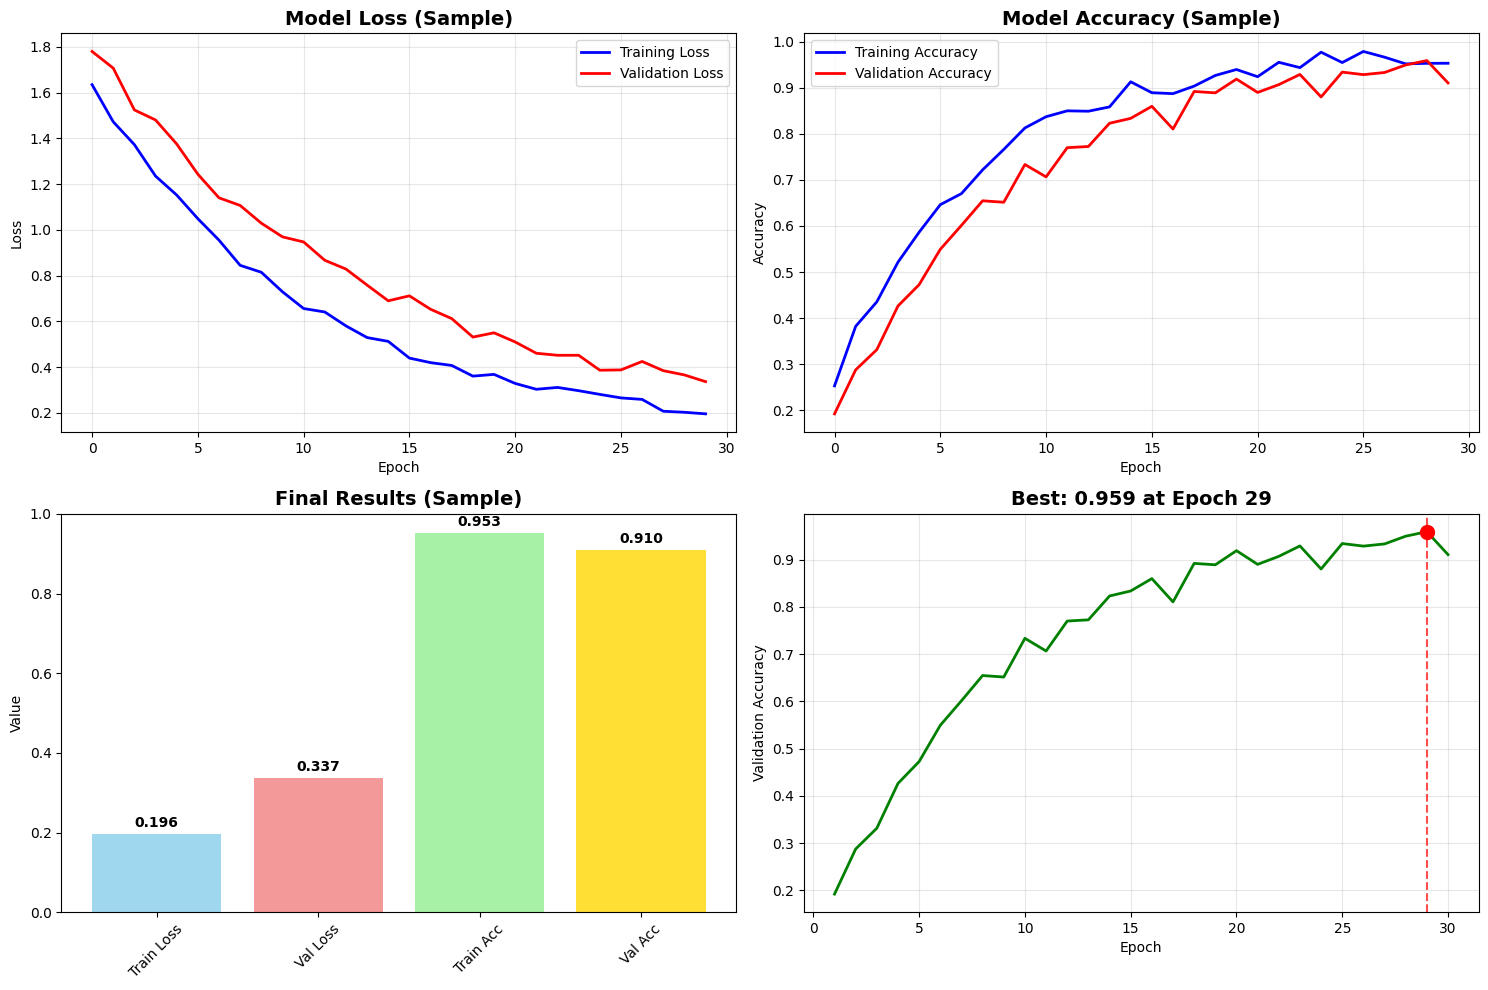

샘플 그래프가 표시되었습니다!
실제 모델 훈련 후에는 plot_real_results(history)를 사용하세요!

사용법:
1. 모델 훈련: history = model.fit(...)
2. 결과 시각화: plot_real_results(history)


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 방법 1: 실제 모델 훈련 후 history가 있는 경우
def plot_real_results(history):
    """실제 훈련 결과를 시각화"""
    plt.figure(figsize=(15, 10))
    
    # 손실 그래프
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], 'b-', linewidth=2, label='Training Loss')
    plt.plot(history.history['val_loss'], 'r-', linewidth=2, label='Validation Loss')
    plt.title('Model Loss', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 정확도 그래프
    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], 'b-', linewidth=2, label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], 'r-', linewidth=2, label='Validation Accuracy')
    plt.title('Model Accuracy', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 최종 결과 비교
    plt.subplot(2, 2, 3)
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    
    categories = ['Train Loss', 'Val Loss', 'Train Acc', 'Val Acc']
    values = [final_train_loss, final_val_loss, final_train_acc, final_val_acc]
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
    
    bars = plt.bar(categories, values, color=colors, alpha=0.8)
    plt.title('Final Results', fontsize=14, fontweight='bold')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    
    # 값 표시
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 최고 성능 표시
    plt.subplot(2, 2, 4)
    best_epoch = np.argmax(history.history['val_accuracy']) + 1
    best_acc = max(history.history['val_accuracy'])
    
    epochs = range(1, len(history.history['val_accuracy']) + 1)
    plt.plot(epochs, history.history['val_accuracy'], 'g-', linewidth=2)
    plt.axvline(x=best_epoch, color='red', linestyle='--', alpha=0.7)
    plt.scatter([best_epoch], [best_acc], color='red', s=100, zorder=5)
    plt.title(f'Best: {best_acc:.3f} at Epoch {best_epoch}', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 요약 출력
    print("\n" + "="*50)
    print("Training Results Summary")
    print("="*50)
    print(f"Training Loss: {final_train_loss:.4f}")
    print(f"Training Accuracy: {final_train_acc:.4f}")
    print(f"Validation Loss: {final_val_loss:.4f}")
    print(f"Validation Accuracy: {final_val_acc:.4f}")
    print(f"Best Validation Accuracy: {best_acc:.4f} (Epoch {best_epoch})")
    print("="*50)

# 방법 2: 테스트용 가짜 데이터로 그래프 확인
def show_sample_graph():
    """테스트용 샘플 그래프를 보여줍니다"""
    print("테스트용 샘플 훈련 결과 그래프를 생성합니다...")
    
    # 가짜 훈련 데이터 생성
    epochs = 30
    
    # 실제적인 훈련 패턴으로 가짜 데이터 생성
    train_loss = [1.5 * np.exp(-0.1 * i) + 0.1 + 0.05 * np.random.random() for i in range(epochs)]
    val_loss = [1.6 * np.exp(-0.08 * i) + 0.15 + 0.08 * np.random.random() for i in range(epochs)]
    train_acc = [1 - np.exp(-0.15 * i) * 0.7 - 0.05 * np.random.random() for i in range(epochs)]
    val_acc = [1 - np.exp(-0.12 * i) * 0.75 - 0.08 * np.random.random() for i in range(epochs)]
    
    plt.figure(figsize=(15, 10))
    
    # 손실 그래프
    plt.subplot(2, 2, 1)
    plt.plot(train_loss, 'b-', linewidth=2, label='Training Loss')
    plt.plot(val_loss, 'r-', linewidth=2, label='Validation Loss')
    plt.title('Model Loss (Sample)', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 정확도 그래프
    plt.subplot(2, 2, 2)
    plt.plot(train_acc, 'b-', linewidth=2, label='Training Accuracy')
    plt.plot(val_acc, 'r-', linewidth=2, label='Validation Accuracy')
    plt.title('Model Accuracy (Sample)', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 최종 결과
    plt.subplot(2, 2, 3)
    categories = ['Train Loss', 'Val Loss', 'Train Acc', 'Val Acc']
    values = [train_loss[-1], val_loss[-1], train_acc[-1], val_acc[-1]]
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
    
    bars = plt.bar(categories, values, color=colors, alpha=0.8)
    plt.title('Final Results (Sample)', fontsize=14, fontweight='bold')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # 성능 진행
    plt.subplot(2, 2, 4)
    best_epoch = np.argmax(val_acc) + 1
    best_acc = max(val_acc)
    
    plt.plot(range(1, epochs + 1), val_acc, 'g-', linewidth=2)
    plt.axvline(x=best_epoch, color='red', linestyle='--', alpha=0.7)
    plt.scatter([best_epoch], [best_acc], color='red', s=100, zorder=5)
    plt.title(f'Best: {best_acc:.3f} at Epoch {best_epoch}', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("샘플 그래프가 표시되었습니다!")
    print("실제 모델 훈련 후에는 plot_real_results(history)를 사용하세요!")

# 즉시 실행할 코드
print("EfficientNet 훈련 결과 시각화")
print("="*50)

# 샘플 그래프 바로 보기
show_sample_graph()

print("\n사용법:")
print("1. 모델 훈련: history = model.fit(...)")
print("2. 결과 시각화: plot_real_results(history)")

In [68]:
# Save the training history
initial_epoch = 0  # or the actual initial epoch of the first training session
saved_history = {
    'loss': history.history['loss'],
    'accuracy': history.history['accuracy'],
    'val_loss': history.history['val_loss'],
    'val_accuracy': history.history['val_accuracy'],
    # Add other metrics as needed
}
np.save("C:\\Users\\User\\Desktop\\Dataset_v2\\saved_history", saved_history)

# **Loading Saved Model....**

In [69]:
# Load the latest checkpoint file
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)

if latest_checkpoint is not None:
    # Create a new model instance
    loaded_model = create_model(summary=True)

    # Load the previously saved weights and silence the warnings
    status = loaded_model.load_weights(latest_checkpoint)
    status.expect_partial()  # Ignore unrestored variables
else:
    print("No checkpoint file found in the specified directory.")

No checkpoint file found in the specified directory.


# **Load the previous history**

In [71]:
# Load the previous history
previous_history = np.load("C:\\Users\\User\\Desktop\\Dataset_v2\\saved_history.npy", allow_pickle=True).item()
initial_epoch = len(previous_history['loss'])
print(initial_epoch)

50


# **Again Train the loaded model.....**

In [ ]:
loaded_model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = loaded_model.fit(
    x=train_images,
    y=train_numeric_labels,
    #initial_epoch=initial_epoch,
    batch_size=16,
    epochs=210,
    validation_data=(test_images, test_numeric_labels),#(validation_images, validation_numeric_labels), #(test_images, test_numeric_labels)
    #class_weight=class_weights,  # Use class_weights dictionary here
    callbacks=[cp_callback],
    shuffle=True
)


In [ ]:
# Update and save the training history
previous_history['loss'].extend(history.history['loss'])
previous_history['accuracy'].extend(history.history['accuracy'])
previous_history['val_loss'].extend(history.history['val_loss'])
previous_history['val_accuracy'].extend(history.history['val_accuracy'])
# Repeat for other metrics as needed

np.save("D:\Data\\fundus_graphs\\efficientB0_saved_history.npy", previous_history)

In [ ]:
import pandas as pd 
pd.DataFrame(previous_history).to_csv("D:\\Data\\Checkpoints_efficientB0Epoch.csv")

In [ ]:
import numpy as np

# Load the previous history
previous_history = np.load("D:\\Data\\fundus_graphs\\efficientB0_saved_history.npy", allow_pickle=True).item()

# Determine the index from which to start loading the first 40 epochs
initial_epoch_start = 0
initial_epoch_end = 60

# Slice the history dictionary to get only the first 40 epochs
first_40_epochs_history = {
    'loss': previous_history['loss'][initial_epoch_start:initial_epoch_end],
    'accuracy': previous_history['accuracy'][initial_epoch_start:initial_epoch_end],
    'val_loss': previous_history['val_loss'][initial_epoch_start:initial_epoch_end],
    'val_accuracy': previous_history['val_accuracy'][initial_epoch_start:initial_epoch_end],
    # Add other metrics as needed
}

# Determine the index from which to start loading the last 20 epochs
last_20_epochs_start = len(previous_history['loss']) - 60

# Slice the history dictionary to get only the last 20 epochs
last_20_epochs_history = {
    'loss': previous_history['loss'][last_20_epochs_start:],
    'accuracy': previous_history['accuracy'][last_20_epochs_start:],
    'val_loss': previous_history['val_loss'][last_20_epochs_start:],
    'val_accuracy': previous_history['val_accuracy'][last_20_epochs_start:],
    # Add other metrics as needed
}

# Merge the first 40 epochs and the last 20 epochs together
merged_history = {
    'loss': first_40_epochs_history['loss'] + last_20_epochs_history['loss'],
    'accuracy': first_40_epochs_history['accuracy'] + last_20_epochs_history['accuracy'],
    'val_loss': first_40_epochs_history['val_loss'] + last_20_epochs_history['val_loss'],
    'val_accuracy': first_40_epochs_history['val_accuracy'] + last_20_epochs_history['val_accuracy'],
    # Add other metrics as needed
}

print("Merged history loaded successfully.")


# **Accuracy and loss graph of training and validation**

# **There will be change in xticks and yticks as per model epochs**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLine2D
import numpy as np

# Plot training & validation loss values
plt.figure(figsize=(10, 6))

# Plot Loss
train_loss, = plt.plot(merged_history['loss'], label='Train Loss', color='blue')
val_loss, = plt.plot(merged_history['val_loss'], label='Validation Loss', color='orange')
train_accuracy, = plt.plot(merged_history['accuracy'], label='Train Accuracy',  color='green')
val_accuracy, = plt.plot(merged_history['val_accuracy'], label='Validation Accuracy', color='red')
# Add a title with specified font properties
plt.title('Model Performance during Training', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12},pad=10)
# Set x-axis label with specified font properties
plt.xlabel('No. of Epochs', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})

# Set x-axis ticks font properties
#plt.xticks(np.linspace(0, len(history.history['loss']), num=6), fontname='Serif', weight='bold')

plt.xticks(np.linspace(0, 120, num=13), fontname='Serif', weight='bold')


# Set y-axis ticks font properties
plt.yticks(np.linspace(0, 4, num=9), fontname='Serif', weight='bold')

# Set the x-axis and y-axis limits
#plt.xlim(0, len(history.history['loss']))

plt.xlim(0, 120)
plt.ylim(0, 3.0)

# Define custom legend lines with desired line properties
legend_lines = [
    Line2D([0], [0], color='blue', lw=3),          # Train Loss
    Line2D([0], [0], color='orange', lw=3),       # Validation Loss
    Line2D([0], [0], color='green', lw=3),        # Train Accuracy
    Line2D([0], [0], color='red', lw=3)           # Validation Accuracy
]

# Place legend outside the graph by adjusting bbox_to_anchor and specifying it to be outside the axes
plt.legend(legend_lines, ['Train Loss', 'Validation Loss', 'Train Accuracy', 'Validation Accuracy'],
           loc='lower center', bbox_to_anchor=(0.5, 1.1), ncol=5,
           prop={'family': 'Serif', 'weight': 'bold', 'size': 8}, frameon=False,
           handler_map={Line2D: HandlerLine2D(numpoints=5)})

# Adjust padding between x-axis label and x-axis ticks
plt.gca().xaxis.labelpad = 10  # Change the value as needed to adjust the space

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Adjust layout to prevent cropping
plt.tight_layout()
plt.savefig('D:\\Data\\EfficientNetB0_accuracy_graph.pdf')  # Save as pdf format
plt.show()


# **Evaluating the model**

In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = loaded_model.evaluate(test_images, test_numeric_labels)

# Print the evaluation metrics (loss and accuracy)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


# **Prediction on Test Dataset**

In [ ]:
# Make predictions on the test dataset
predictions = loaded_model.predict(test_images)

# Get predicted labels (convert from numeric to string labels using inverse mapping)
inverse_label_map = {v: k for k, v in label_map.items()}
predicted_labels = [inverse_label_map[np.argmax(pred)] for pred in predictions]
# Print test and predicted labels
for i in range(len(test_labels)):
    print(f"Test Label: {test_labels[i]}, Predicted Label: {predicted_labels[i]}")


# **Classification Report**

In [ ]:
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, digits=4))

# **Evaluation Metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, jaccard_score,roc_auc_score

# Assuming predicted_probs contains the probabilities for each class

predicted_probs = loaded_model.predict(test_images)
# Calculate Accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy: {accuracy}")

# Calculate Precision, Recall, F1 Score
precision = precision_score(test_labels, predicted_labels, average='weighted')
print(f"Precision: {precision}")

recall = recall_score(test_labels, predicted_labels, average='weighted')
print(f"Recall: {recall}")

f1 = f1_score(test_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1}")

# Calculate Jaccard Score
jaccard = jaccard_score(test_labels, predicted_labels, average='weighted')
print(f"Jaccard Score: {jaccard}")

logloss = log_loss(test_numeric_labels, predicted_probs)
print(f"Log Loss: {logloss}")

# **ROC AUC Score**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode string labels ('A', 'D', 'G', 'N') to numeric labels
numeric_test_labels = label_encoder.fit_transform(test_labels)

# Calculate ROC AUC score using One-vs-Rest (ovr) strategy
roc_auc_ovr = roc_auc_score(numeric_test_labels, predicted_probs, multi_class='ovr')
print(f"ROC AUC Score (One-vs-Rest): {roc_auc_ovr}")

# Calculate ROC AUC score using One-vs-One (ovo) strategy
roc_auc_ovo = roc_auc_score(numeric_test_labels, predicted_probs, multi_class='ovo')
print(f"ROC AUC Score (One-vs-One): {roc_auc_ovo}")


# **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)
accuracy_percentage = accuracy * 100

# Plot confusion matrix
plt.figure(figsize=(5, 4))
# Define the custom palette
custom_palette = sns.light_palette("seagreen", as_cmap=True)
# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}

# Create heatmap with annotations and colormap
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette,
                      xticklabels=['A', 'D', 'G', 'N'], yticklabels=['A', 'D', 'G', 'N'],
                      annot_kws={"family": "Serif", 'color':'black','weight': 'bold', 'size': 13})

# Set x and y labels with the custom font dictionary
heatmap.set_xlabel('Predicted Labels', fontdict=font2)
heatmap.set_ylabel('Target Labels', fontdict=font2)
heatmap.set_title('Fundus Image Classification\nAccuracy: {:.2f}%'.format(accuracy_percentage),
                  fontdict=font, pad=12)

# Set font properties for tick labels on both axes
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontname='Serif', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Serif', fontsize=12)

# Create a color bar to indicate the scale
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
# Adjust padding between x-axis label and x-axis ticks
plt.gca().xaxis.labelpad = 10  # Change the value as needed to adjust the space
# Adjust layout to prevent cropping
plt.tight_layout()
plt.savefig('D:\Data\\fundus_graphs\\EfficientNetB0_confusion_matrix.pdf')  # Save as pdf format
plt.show()


# **No. 1 : Explainable AI (GradCAM)**

* Step 1: Prepare the Model (We've done it already)
* Step 2: Load and Preprocess an Image (We'll need an image to visualize the Grad-CAM heatmap)
* Step 3: Get the Class Activation Map (CAM) (We'll create a function to generate the Grad-CAM heatmap using the model we've built)

# **Function for displaying Original and GradCAM images**

In [ ]:
# Function to save and display GradCAM
def save_and_display_gradcam(img_path, heatmap, alpha=0.7):
    # Load the original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize image to match model input size

    # Resize heatmap to match the image dimensions
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Apply heatmap on the original image
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)

    # Display the GradCAM visualization using Matplotlib
    plt.figure(figsize=(3, 3))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('GradCAM', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
    plt.axis('off')
    plt.tight_layout()
    # Save the figure
    plt.savefig('D:\Data\\fundus_graphs\\efficientB0_gradcam.pdf')  # Save as pdf format
    plt.show()



# **GradCAM function**

 **Gradient Calculation:** Using these activations, GradCAM computes the gradients of the predicted class's score with respect to the feature maps. These gradients indicate the importance of each feature map in determining the final class prediction.

**Global Average Pooling (GAP):** GradCAM takes the gradients and performs Global Average Pooling (GAP) across the spatial dimensions of each feature map. This step generates a weight for each feature map, reflecting its relevance to the predicted class.

**Weighted Combination:** GradCAM computes a weighted combination of the feature maps based on their importance weights obtained from GAP. This combination highlights the regions in the feature maps that strongly influence the predicted class.

**Heatmap Generation:** The weighted combination produces a heatmap by overlaying these selected regions back onto the input image. The heatmap visually demonstrates which parts of the image are pivotal in the model's decision-making for the predicted class.

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):

    model.layers[-1].activation = None
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()



# **Visualization of Grad-Cam**

In [ ]:
 # make a prediction and visualize grad-cam
def make_prediction_and_visualize_():
    img_path = 'D:\\Data\\fundus\\train\\Original\\150_A.png'

    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224)) #IMG_WIDTH, IMG_HEIGHT
    rescaled_img = img/255.0
    batch_pred = np.expand_dims(rescaled_img, 0)


    last_conv_layer_name = 'top_conv'

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(batch_pred, loaded_model, last_conv_layer_name)

    save_and_display_gradcam(img_path, heatmap)


make_prediction_and_visualize_()

# **No. 2 : Explainable AI (GradCAM++)**



* Step 1: Prepare the Model (We've done it already)
* Step 2: Load and Preprocess an Image (We'll need an image to visualize the Grad-CAM++ heatmap)
* Step 3: Get the Class Activation Map (CAM) (We'll create a function to generate the Grad-CAM++ heatmap using the model we've built)

# **Function for displaying Original and GradCAM++ images**

In [ ]:
# Function to save and display ScoreCAM
def save_and_display_gradcam_plusplus(img_path, heatmap, alpha=0.7):
    # Load the original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize image to match model input size

    # Resize heatmap to match the image dimensions
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Apply heatmap on the original image
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)

    # Display the GradCAM visualization using Matplotlib
    plt.figure(figsize=(3, 3))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('GradCAM++', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
    plt.axis('off')
    plt.tight_layout()
    # Save the figure
    plt.savefig('D:\Data\\fundus_graphs\\efficientB0__gradcam_plusplus.pdf')  # Save as pdf format
    plt.show()



# **GradCAM++ function**

* **Gradient Computation:** Derive gradients between predicted class and conv layer's output, indicating feature map importance.
* **Positive and Negative Gradients:** Split gradients into positive (activating) and negative (inhibiting) parts, signifying influential and counteractive regions.
* **Weighting and Aggregation:** Calculate separate importance weights from positive and negative gradients, combining them to determine feature map significance.
* **Weighted Sum and Heatmap:** Blend positive and negative weights to generate a weighted sum, utilized for heatmap creation, pinpointing significant regions contributing to the predicted class.

In [ ]:
# Function to generate GradCAM++ heatmap
def make_gradcam_plusplus_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    model.layers[-1].activation = None
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_output = preds[:, pred_index]
        conv_output = last_conv_layer_output[0]

    # Get gradients
    grads = tape.gradient(class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads[0], axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]

    # Calculate guided gradients
    guided_grads = tf.cast(last_conv_layer_output > 0, 'float32') * grads[0]

    # Calculate importance weights
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))

    # Generate heatmap
    heatmap = tf.reduce_sum(tf.multiply(weights, last_conv_layer_output), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)  # Normalize

    return heatmap.numpy()


# **Visualization of Grad-Cam++**

In [ ]:
# Function to make a prediction and visualize GradCAM++
def make_prediction_and_visualize_gradcam_plusplus():
    img_path = 'D:\\Data\\fundus\\train\\Original\\150_A.png'


    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize image to match model input size
    rescaled_img = img / 255.0
    batch_pred = np.expand_dims(rescaled_img, 0)

    last_conv_layer_name = 'top_conv'

    # Generate GradCAM++ heatmap
    heatmap = make_gradcam_plusplus_heatmap(batch_pred, loaded_model, last_conv_layer_name)

    save_and_display_gradcam_plusplus(img_path, heatmap)

make_prediction_and_visualize_gradcam_plusplus()

# **No. 3 : Explainable AI (ScoreCAM)**
* Step 1: Prepare the Model (We've done it already)
* Step 2: Load and Preprocess an Image (We'll need an image to visualize the Score-CAM heatmap)
* Step 3: Get the Class Activation Map (CAM) (We'll create a function to generate the Score-CAM heatmap using the model we've built)


In [ ]:
# Function to save and display ScoreCAM
def save_and_display_scorecam(img_path, heatmap, alpha=0.5):
    # Load the original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize image to match model input size

    # Resize heatmap to match the image dimensions
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Apply heatmap on the original image
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)

    # Display the GradCAM visualization using Matplotlib
    plt.figure(figsize=(3, 3))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('ScoreCAM', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
    plt.axis('off')
    plt.tight_layout()
    # Save the figure
    plt.savefig('D:\Data\\fundus_graphs\\efficientB0__scorecam.pdf')  # Save as pdf format
    plt.show()



# **ScoreCAM function**
* **Gradient Computation:** Score-CAM calculates the gradients of the predicted class score with respect to the output feature maps, just like Grad-CAM. These gradients provide information about the importance of each feature map in the predicted class's activation.
* **Guided Gradients:** Instead of considering positive and negative gradients separately, Score-CAM utilizes guided gradients to focus only on positive gradients, i.e., gradients that have a positive influence on the predicted class. This step enhances the saliency of the significant regions.
* **Global Average Pooling (GAP):** Score-CAM performs Global Average Pooling (GAP) across the spatial dimensions of the guided gradients to generate importance weights for each feature map, indicating their relevance to the predicted class.
* **Score-weighted Activation Map:** The technique computes a score-weighted activation map by multiplying the weights obtained from GAP with the feature maps and summing across channels. This highlights the regions in the feature maps that contribute the most to the predicted class, emphasizing the most discriminative areas in the input image.

In [ ]:
import tensorflow as tf

def make_scorecam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    model.layers[-1].activation = None
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_output = preds[:, pred_index]
        conv_output = last_conv_layer_output[0]

    # Get the gradients of the predicted class with respect to the output feature map
    grads = tape.gradient(class_output, last_conv_layer_output)
    guided_grads = tf.cast(grads[0] > 0, 'float32') * grads[0]

    # GAP (Global Average Pooling) along the spatial dimensions
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))

    # Calculate the score-weighted activation map
    cam = tf.reduce_sum(tf.multiply(weights, conv_output), axis=-1)
    cam = tf.maximum(cam, 0)  # ReLU to ensure non-negativity
    cam /= tf.reduce_max(cam)  # Normalize

    return cam.numpy()


# **Visualization of ScoreCam**

In [ ]:
# make a prediction and visualize ScoreCAM
def make_prediction_and_visualize_scorecam():
    img_path = 'D:\\Data\\fundus\\train\\Original\\150_A.png'


    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224)) #IMG_WIDTH, IMG_HEIGHT
    rescaled_img = img/255.0
    batch_pred = np.expand_dims(rescaled_img, 0)

    last_conv_layer_name = 'top_conv'

    # Generate class activation heatmap
    heatmap = make_scorecam_heatmap(batch_pred, loaded_model, last_conv_layer_name)

    save_and_display_scorecam(img_path, heatmap)

make_prediction_and_visualize_scorecam()


# **No. 4 : Explainable AI (Faster Score-CAM)**
* step 1: Prepare the Model (We've done it already)
* Step 2: Load and Preprocess an Image (We'll need an image to visualize the Faster Score-CAM heatmap)
* Step 3: Get the Class Activation Map (CAM) (We'll create a function to generate the Faster Score-CAM heatmap using the model we've built)


# **Function for displaying Original and Faster ScoreCAM images**

In [ ]:
# Function to save and display Faster ScoreCAM
def save_and_display_faster_scorecam(img_path, heatmap, alpha=0.7):
    # Load the original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize image to match model input size

    # Resize heatmap to match the image dimensions
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Apply heatmap on the original image
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)

    # Display the GradCAM visualization using Matplotlib
    plt.figure(figsize=(3, 3))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('Faster ScoreCAM', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
    plt.axis('off')
    plt.tight_layout()
    # Save the figure
    plt.savefig('D:\Data\\fundus_graphs\\efficientB0__faster_scorecam.pdf')  # Save as pdf format
    plt.show()



# **Faster ScoreCAM function**

* **Gradient Calculation:** Using a GradientTape, it computes the gradients of the predicted class output with respect to the output feature map of the specified last convolutional layer.

* **Global Average Pooling (GAP):** The gradients obtained are subjected to Global Average Pooling (GAP) along the spatial dimensions, resulting in weights representing the importance of each feature map in the predicted class's activation.

* **Weighted Sum Calculation:** Reshaping the obtained weights and the convolutional output, the function performs matrix multiplication between them, efficiently obtaining a score-weighted activation map that highlights significant regions related to the predicted class.

* **Normalization and ReLU:** The resulting score-weighted activation map is normalized and subjected to ReLU (Rectified Linear Unit) activation, ensuring non-negativity and scaling to highlight the most influential regions.

In [ ]:
def faster_scorecam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    model.layers[-1].activation = None
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_output = preds[:, pred_index]
        conv_output = last_conv_layer_output[0]

    # Get the gradient of the predicted class with respect to the output feature map
    grads = tape.gradient(class_output, last_conv_layer_output)[0]

    # Global average pooling (GAP) to compute weights
    weights = tf.reduce_mean(grads, axis=(0, 1))

    # Reshape the weights to perform matrix multiplication with the convolutional output
    weights = tf.reshape(weights, (1, 1, -1))

    # Reshape conv_output to match the dimensions for matrix multiplication
    conv_output = tf.expand_dims(conv_output, axis=0)
    conv_output = tf.expand_dims(conv_output, axis=-1)  # Add a new dimension for matrix multiplication

    # Calculate the score-weighted activation map efficiently
    cam = tf.matmul(weights, conv_output)
    cam = tf.squeeze(cam)
    cam = tf.maximum(cam, 0)  # ReLU to ensure non-negativity
    cam /= tf.reduce_max(cam)  # Normalize

    return cam.numpy()


# **Visualization of faster ScoreCam**

In [ ]:
# make a prediction and visualize Faster ScoreCAM
def make_prediction_and_visualize_faster_scorecam():
    img_path = 'D:\\Data\\fundus\\train\\Original\\150_A.png'


    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224)) #IMG_WIDTH, IMG_HEIGHT
    rescaled_img = img/255.0
    batch_pred = np.expand_dims(rescaled_img, 0)

    last_conv_layer_name = 'top_conv'

    # Generate class activation heatmap
    heatmap = faster_scorecam_heatmap(batch_pred, loaded_model, last_conv_layer_name)

    save_and_display_faster_scorecam(img_path, heatmap)

make_prediction_and_visualize_faster_scorecam()


# **No. 5 : Explainable AI (LayerCAM)**

* Step 1: Prepare the Model (We've done it already)
* Step 2: Load and Preprocess an Image (We'll need an image to visualize the LayerCAM heatmap)
* Step 3: Get the Class Activation Map (CAM) (We'll create a function to generate the LayerCAM heatmap using the model we've built)

# **Function for displaying Original and LayerCAM images**

In [ ]:
# Function to save and display layercam
def save_and_display_layercam(img_path, heatmap, alpha=0.7):
    # Load the original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize image to match model input size

    # Resize heatmap to match the image dimensions
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Apply heatmap on the original image
    superimposed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)

    # Display the GradCAM visualization using Matplotlib
    plt.figure(figsize=(3, 3))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title('LayerCAM', fontdict={'family': 'Serif', 'weight': 'bold', 'size': 12})
    plt.axis('off')
    plt.tight_layout()
    # Save the figure
    plt.savefig('D:\Data\\fundus_graphs\\efficientB0_layercam.pdf')  # Save as pdf format
    plt.show()



# **LayerCAM function**

* **Gradient Calculation:** Utilize a gradient tape to compute gradients of the predicted class score with respect to the output feature maps obtained from the chosen layer.

* **Global Average Pooling (GAP):** Perform Global Average Pooling across the spatial dimensions of the gradients to generate importance weights for each feature map.

* **Weight Reshaping:** Reshape the obtained weights to fit the required dimensions for subsequent matrix multiplication.

* **Activation Map Computation:** Compute a score-weighted activation map by performing a matrix multiplication between the reshaped weights and the output feature maps from the chosen layer.

* **Activation Map Adjustment:** Apply Rectified Linear Unit (ReLU) to ensure non-negativity in the heatmap.

* **Normalization:** Normalize the heatmap to ensure that the values fall within a certain range, often between 0 and 1, which aids in visualization.

In [ ]:
import tensorflow as tf

def generate_layercam_heatmap(img_array, model, last_conv_layer_name, target_class_index=None):
    model.layers[-1].activation = None
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if target_class_index is None:
            target_class_index = tf.argmax(preds[0])
        class_output = preds[:, target_class_index]
        conv_output = last_conv_layer_output[0]

    # Calculate gradients of the predicted class with respect to the output feature map
    grads = tape.gradient(class_output, last_conv_layer_output)[0]

    # Global average pooling (GAP) to compute weights
    weights = tf.reduce_mean(grads, axis=(0, 1))

    # Reshape the weights to perform matrix multiplication with the convolutional output
    weights = tf.reshape(weights, (1, 1, -1))

    # Expand dimensions of conv_output for matrix multiplication
    conv_output = tf.expand_dims(conv_output, axis=0)
    conv_output = tf.expand_dims(conv_output, axis=-1)  # Add a new dimension for matrix multiplication

    # Calculate the score-weighted activation map (LayerCAM)
    cam = tf.matmul(weights, conv_output)
    cam = tf.squeeze(cam)
    cam = tf.maximum(cam, 0)  # ReLU to ensure non-negativity
    cam /= tf.reduce_max(cam)  # Normalize

    return cam.numpy()


# **Visualization of LayerCAM**

In [ ]:
# make a prediction and visualize layercam
def make_prediction_and_visualize_layercam():
    img_path = img_path = 'D:\\Data\\fundus\\train\\Original\\150_A.png'

    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))#IMG_WIDTH, IMG_HEIGHT
    rescaled_img = img/255.0
    batch_pred = np.expand_dims(rescaled_img, 0)

    last_conv_layer_name = 'top_conv'

    # Generate class activation heatmap
    heatmap = generate_layercam_heatmap(batch_pred, loaded_model, last_conv_layer_name)

    save_and_display_layercam(img_path, heatmap)


make_prediction_and_visualize_layercam()